Graphviz helps turn a trained decision tree model into a clear, visual diagram that shows every split and class decision, which makes decision trees especially easy to interpret and explain. It works by exporting the tree from scikit-learn into DOT format, then rendering it as a graph with automatically arranged nodes and edges.

### Why visualize decision trees?

Decision trees are popular supervised learning models used for both classification (predicting categories) and regression (predicting numbers). They do not require feature scaling and can be visualized directly, so you can inspect how the model uses features to make decisions and justify results to stakeholders. A tree diagram makes it obvious which questions are asked at each node, what paths lead to each prediction, and how confident the model is, which is much harder to see with models like logistic regression or neural networks.

### What is Graphviz?

Graphviz is open‑source graph visualization software that represents structures (graphs/networks) as node‑and‑edge diagrams using the DOT language. Its main capabilities are:
​
- Automatic layout: It computes positions of nodes and edges so the diagram is readable without manual dragging.
- Customization: You can tweak colors, fonts, shapes, and styles to highlight classes or important splits.
- Cross‑platform use: Graphs export to PNG, PDF, SVG, etc., and display well in different browsers and environments.
- Dynamic updates: Since diagrams come from text/DOT, they can be regenerated when the model or data changes, which is useful in interactive apps or notebooks.

## Training a decision tree in scikit‑learn
Before visualizing, you need a trained tree. For the Iris dataset, a minimal example is:

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Create a DecisionTreeClassifier, call fit(X, y) with your features and labels, and the model learns the splits.

## Exporting the tree with export_graphviz
Scikit‑learn provides sklearn.tree.export_graphviz to convert the trained tree into DOT format that Graphviz understands.

In [ ]:
from sklearn import tree

dot_data = tree.export_graphviz(
    model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None   # return DOT as a string
)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<petal length (cm) &le; 2.45<br/>gini = 0.667<br/>samples = 120<br/>value = [40, 41, 39]<br/>class = versicolor>, fillcolor="#fdfffd"] ;\n1 [label=<gini = 0.0<br/>samples = 40<br/>value = [40, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<petal length (cm) &le; 4.75<br/>gini = 0.5<br/>samples = 80<br/>value = [0, 41, 39]<br/>class = versicolor>, fillcolor="#f5fef9"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<petal width (cm) &le; 1.65<br/>gini = 0.053<br/>samples = 37<br/>value = [0, 36, 1]<br/>class = versicolor>, fillcolor="#3ee684"] ;\n2 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 36<br/>value = [0, 36, 0]<br/>class = versicolor>, fillcolor="#39e581"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 0, 1]<br/>class = vi

Key arguments (matching the transcript):

- decision_tree=model: the trained DecisionTreeClassifier to export.
- feature_names=feature_names: labels for each input column (e.g., petal length, petal width).
- class_names=class_names: labels for output classes (e.g., setosa, versicolor, virginica).
- filled=True: colors nodes by majority class and class proportion.
- ​rounded=True: draws rounded node boxes.
- ​special_characters=True: makes text rendering safer for special characters.
- out_file=None: return DOT as a string (easier to pipe into Python Graphviz).

## Rendering with Graphviz in Python
Once you have dot_data, render it using the graphviz Python package.

- Source(dot_data) creates a Graphviz object from the DOT string.
- ​view() writes a temporary file and opens it.
- render() lets you control filename and format (PNG, PDF, SVG, etc.)

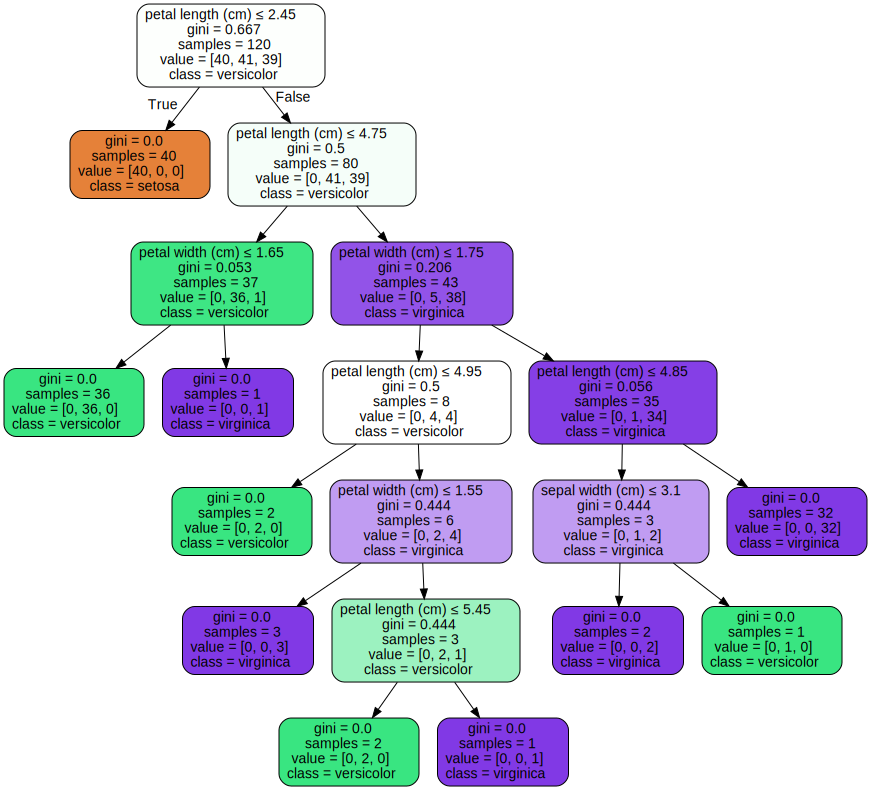

In [5]:
from graphviz import Source

graph = Source(dot_data)
# graph.view()     # opens the rendered file in a viewer
# or:
# graph.render("iris_tree", format="png", cleanup=True)

graph

## Reading the generated decision tree diagram

Each node box in the decision tree visualization includes several annotations, just as described in the video:

- Split question (for non‑leaf nodes): The top line is the yes/no question, such as "petal_length <= 2.45". This describes how the node splits samples based on a single feature at a time (scikit‑learn trees always split on one feature per node, unlike the hand‑built multi‑feature rules in the earlier manual example).
- Impurity/entropy: A numeric impurity measure (e.g., Gini or entropy) indicating how mixed the classes are at that node.
- samples: How many training instances reached that node (e.g., root: 150 samples for the full Iris dataset).
​- value: The class counts at that node—for Iris, something like [50, 0, 0] for 50 setosa, 0 versicolor, 0 virginica, or [0, 49, 5] for 49 versicolor and 5 virginica out of 54.
​- class: The predicted class at that node, defined as the majority class given all the rules above it (e.g., versicolor for [0, 49, 5]).   

​
Node color encodes the majority class:
- Hue corresponds to the majority class.
- Intensity (darkness) reflects confidence (how dominant that class is among samples at the node).
- Nodes with ties (no single majority) can appear very light or essentially uncolored, matching the “no majority class” comment in the transcript.


## Pros of Graphviz 

- Open‑source and free, with multiple packages and libraries for graphics, utilities, and drawing.
- Interactive, sometimes web‑based GUIs or integrations that allow zooming and panning large diagrams.
- Built on the DOT language, which is simple text, easy to version control and generate programmatically.
- Auxiliary tools and language bindings (Python graphviz, pydot, networkx conversions, etc.) for broader integration in data workflows.

## Cons and typical limitations

- Learning curve: Official documentation can feel fragmented or outdated, so newcomer guidance is weaker than some modern libraries.
- Community size: Its ecosystem is smaller than mainstream data‑viz tools, so tutorials and troubleshooting help can be harder to find.
- Limited fine‑grained layout control: Graphviz optimizes layout automatically; micro‑adjusting node positions is not always straightforward, which some users see as a limitation.

Sources:  

[1](https://github.com/xflr6/graphviz)
[2](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)
[3](https://scikit-learn.org/stable/modules/tree.html)
[4](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[5](https://christophm.github.io/interpretable-ml-book/tree.html)
[6](https://pypi.org/project/graphviz/0.20.2/)
[7](https://scikit-learn.org/0.16/modules/generated/sklearn.tree.export_graphviz.html)
[8](https://news.ycombinator.com/item?id=23475225)
[9](https://www.g2.com/products/graphviz/reviews?qs=pros-and-cons)
[10](https://elvanco.com/blog/how-to-implement-a-decision-tree-classifier-in)
[11](https://ogrisel.github.io/scikit-learn.org/dev/modules/generated/sklearn.tree.export_graphviz.html)
[12](https://www.deepchecks.com/question/what-is-the-decision-boundary-formula/)
[13](https://scipython.com/blog/plotting-the-decision-boundary-of-a-logistic-regression-model/)
[14](https://mlu-explain.github.io/decision-tree/)
[15](https://www.datacamp.com/tutorial/decision-tree-classification-python)
[16](https://sdsclub.com/7-mistakes-to-avoid-using-graphviz-python-tool-for-graphs-visualization/)
[17](https://github.com/pydot/pydot)